In [1]:
import cv2
import numpy as np
from PIL import Image
import queue
import matplotlib.pyplot as plt

In [2]:
class Vertex:
    def __init__(self,x_coordinate,y_coordinate):
        self.x = x_coordinate
        self.y = y_coordinate
        self.xParent = None
        self.yParent = None
        self.processed = False
        self.queueIndex = None
        self.condition = None

In [3]:
def get_neighbors(mat, r, c):
    shape=mat.shape
    neighbors=[]
    #ensure neighbors are within image boundaries
    if r > 0 and not mat[r-1][c].processed and not mat[r-1][c].condition ==0:
        neighbors.append(mat[r-1][c])
    if r < shape[0] - 1 and not mat[r+1][c].processed and not mat[r+1][c].condition ==0:
        neighbors.append(mat[r+1][c])
    if c > 0 and not mat[r][c-1].processed and not mat[r][c-1].condition ==0:
        neighbors.append(mat[r][c-1])
    if c < shape[1] - 1 and not mat[r][c+1].processed and not mat[r][c+1].condition == 0:
        neighbors.append(mat[r][c+1])
    return neighbors

In [4]:
def path_from(matrix, x, y, xS, yS):
    path = []
    iter_v=matrix[y][x]
    path.append((x,y))
    while(iter_v.y!=yS or iter_v.x!=xS):
        path.append((iter_v.x,iter_v.y))
        iter_v=matrix[iter_v.yParent][iter_v.xParent]
    path.append((xS,yS))
    return path

In [30]:
def find_shortest_path_dfs(matrix, x_start, y_start, x_end, y_end):
    #assuming start and end are withing bounds
    #let 0 be black (can't visit)
    #let 1 be white (can visit)
    lenrows, lencols = matrix.shape
    print('rows', lenrows)
    print('cols', lencols)
    vectorMatrix = np.full((lenrows, lencols), None)
    for r in range(lenrows):
        for c in range(lencols):
            #print(matrix[0][0])
            vectorMatrix[r][c] = Vertex(c, r)
            vectorMatrix[r][c].condition = matrix[r][c]
    #vectorMatrix[y_start][x_start].condition = -1
    vectorMatrix[y_end][x_end].condition = -2
    stack = []
    stack.append(vectorMatrix[y_start][x_start])
    while len(stack) > 0:
        visiting_node = stack.pop()
        if visiting_node.condition == -2:
            print('found')
            path = []
            iter_v=neighbor
            path.append((x_end,y_end))
            #print('itertype1')
            #print(type(iter_v))
            while(iter_v.y != y_start or iter_v.x != x_start):
                path.append((iter_v.x,iter_v.y))
                #print(iter_v.xParent)
                #print(iter_v.yParent)
                iter_v = vectorMatrix[iter_v.yParent][iter_v.xParent]
                #print('itertype2')
                #print(type(iter_v))
                #print('test2')
            return path
        
        visiting_node.processed = True
        for neighbor in get_neighbors(vectorMatrix, visiting_node.y, visiting_node.x):
            stack.append(neighbor)
            neighbor.xParent = visiting_node.x
            neighbor.yParent = visiting_node.y
    print('not found')
    return None 
            

In [34]:
def draw_path(img,path, thickness=2):
    '''path is a list of (x,y) tuples'''
    print('drawing path')
    x0,y0=path[0]
    for vertex in path[1:]:
        print(vertex)
        x1,y1=vertex
        cv2.line(img,(x0,y0),(x1,y1),(0,0,255),thickness)
        x0,y0=vertex

In [8]:
def cv2_to_PIL(image):
    return Image.fromarray(image)

In [12]:
def solve_maze_dfs(image: str, x_start, y_start, x_end, y_end):
    image_array = cv2.imread(image, 0)
    ret,thresh1 = cv2.threshold(image_array,127,255,cv2.THRESH_BINARY)
    image_array_color = cv2.imread(image,1)
    draw_path(image_array_color, find_shortest_path_dfs(thresh1, x_start, y_start, x_end, y_end), 6)
    cv2.circle(image_array_color, (x_start, y_start), 5, (0,200,40), -1)
    cv2.circle(image_array_color, (x_end, y_end), 5, (255,0,0), -1)
    return cv2_to_PIL(image_array_color)

rows 860
cols 820
found
drawing path
(800, 815)
(801, 815)
(802, 815)
(803, 815)
(804, 815)
(805, 815)
(806, 815)
(807, 815)
(808, 815)
(809, 815)
(810, 815)
(811, 815)
(812, 815)
(813, 815)
(814, 815)
(815, 815)
(816, 815)
(817, 815)
(818, 815)
(819, 815)
(819, 814)
(818, 814)
(817, 814)
(816, 814)
(815, 814)
(814, 814)
(813, 814)
(812, 814)
(811, 814)
(810, 814)
(809, 814)
(808, 814)
(807, 814)
(806, 814)
(805, 814)
(804, 814)
(803, 814)
(802, 814)
(801, 814)
(800, 814)
(799, 814)
(798, 814)
(797, 814)
(796, 814)
(795, 814)
(794, 814)
(793, 814)
(792, 814)
(791, 814)
(790, 814)
(789, 814)
(788, 814)
(787, 814)
(786, 814)
(785, 814)
(784, 814)
(783, 814)
(782, 814)
(781, 814)
(780, 814)
(779, 814)
(778, 814)
(777, 814)
(776, 814)
(775, 814)
(774, 814)
(773, 814)
(772, 814)
(771, 814)
(770, 814)
(769, 814)
(768, 814)
(767, 814)
(766, 814)
(765, 814)
(764, 814)
(763, 814)
(762, 814)
(761, 814)
(760, 814)
(759, 814)
(758, 814)
(757, 814)
(756, 814)
(755, 814)
(754, 814)
(753, 814)
(752, 

(788, 806)
(787, 806)
(786, 806)
(785, 806)
(784, 806)
(783, 806)
(782, 806)
(781, 806)
(780, 806)
(779, 806)
(778, 806)
(777, 806)
(776, 806)
(775, 806)
(774, 806)
(773, 806)
(772, 806)
(771, 806)
(770, 806)
(769, 806)
(768, 806)
(767, 806)
(766, 806)
(765, 806)
(764, 806)
(763, 806)
(762, 806)
(761, 806)
(760, 806)
(759, 806)
(758, 806)
(757, 806)
(756, 806)
(755, 806)
(754, 806)
(753, 806)
(752, 806)
(751, 806)
(750, 806)
(749, 806)
(748, 806)
(747, 806)
(746, 806)
(745, 806)
(744, 806)
(743, 806)
(742, 806)
(741, 806)
(740, 806)
(739, 806)
(738, 806)
(737, 806)
(736, 806)
(735, 806)
(734, 806)
(733, 806)
(732, 806)
(731, 806)
(730, 806)
(729, 806)
(728, 806)
(727, 806)
(726, 806)
(725, 806)
(724, 806)
(723, 806)
(722, 806)
(721, 806)
(720, 806)
(719, 806)
(718, 806)
(717, 806)
(716, 806)
(715, 806)
(714, 806)
(713, 806)
(712, 806)
(711, 806)
(710, 806)
(709, 806)
(708, 806)
(707, 806)
(706, 806)
(705, 806)
(704, 806)
(703, 806)
(702, 806)
(701, 806)
(700, 806)
(699, 806)
(698, 806)

(789, 740)
(788, 740)
(787, 740)
(786, 740)
(785, 740)
(784, 740)
(783, 740)
(782, 740)
(781, 740)
(780, 740)
(779, 740)
(778, 740)
(777, 740)
(776, 740)
(775, 740)
(774, 740)
(773, 740)
(772, 740)
(771, 740)
(770, 740)
(770, 739)
(771, 739)
(772, 739)
(773, 739)
(774, 739)
(775, 739)
(776, 739)
(777, 739)
(778, 739)
(779, 739)
(780, 739)
(781, 739)
(782, 739)
(783, 739)
(784, 739)
(785, 739)
(786, 739)
(787, 739)
(788, 739)
(789, 739)
(790, 739)
(791, 739)
(792, 739)
(793, 739)
(794, 739)
(795, 739)
(795, 738)
(794, 738)
(793, 738)
(792, 738)
(791, 738)
(790, 738)
(789, 738)
(788, 738)
(787, 738)
(786, 738)
(785, 738)
(784, 738)
(783, 738)
(782, 738)
(781, 738)
(780, 738)
(779, 738)
(778, 738)
(777, 738)
(776, 738)
(775, 738)
(774, 738)
(773, 738)
(772, 738)
(771, 738)
(770, 738)
(770, 737)
(771, 737)
(772, 737)
(773, 737)
(774, 737)
(775, 737)
(776, 737)
(777, 737)
(778, 737)
(779, 737)
(780, 737)
(781, 737)
(782, 737)
(783, 737)
(784, 737)
(785, 737)
(786, 737)
(787, 737)
(788, 737)

(707, 660)
(708, 660)
(709, 660)
(710, 660)
(711, 660)
(712, 660)
(713, 660)
(714, 660)
(715, 660)
(716, 660)
(716, 659)
(715, 659)
(714, 659)
(713, 659)
(712, 659)
(711, 659)
(710, 659)
(709, 659)
(708, 659)
(707, 659)
(706, 659)
(705, 659)
(704, 659)
(703, 659)
(702, 659)
(701, 659)
(700, 659)
(699, 659)
(698, 659)
(697, 659)
(696, 659)
(695, 659)
(694, 659)
(693, 659)
(692, 659)
(692, 658)
(693, 658)
(694, 658)
(695, 658)
(696, 658)
(697, 658)
(698, 658)
(699, 658)
(700, 658)
(701, 658)
(702, 658)
(703, 658)
(704, 658)
(705, 658)
(706, 658)
(707, 658)
(708, 658)
(709, 658)
(710, 658)
(711, 658)
(712, 658)
(713, 658)
(714, 658)
(715, 658)
(716, 658)
(716, 657)
(715, 657)
(714, 657)
(713, 657)
(712, 657)
(711, 657)
(710, 657)
(709, 657)
(708, 657)
(707, 657)
(706, 657)
(705, 657)
(704, 657)
(703, 657)
(702, 657)
(701, 657)
(700, 657)
(699, 657)
(698, 657)
(697, 657)
(696, 657)
(695, 657)
(694, 657)
(693, 657)
(692, 657)
(692, 656)
(693, 656)
(694, 656)
(695, 656)
(696, 656)
(697, 656)

(545, 666)
(546, 666)
(547, 666)
(548, 666)
(549, 666)
(550, 666)
(551, 666)
(552, 666)
(553, 666)
(554, 666)
(555, 666)
(556, 666)
(557, 666)
(558, 666)
(559, 666)
(559, 667)
(558, 667)
(557, 667)
(556, 667)
(555, 667)
(554, 667)
(553, 667)
(552, 667)
(551, 667)
(550, 667)
(549, 667)
(548, 667)
(547, 667)
(546, 667)
(545, 667)
(544, 667)
(543, 667)
(542, 667)
(541, 667)
(540, 667)
(539, 667)
(538, 667)
(537, 667)
(536, 667)
(535, 667)
(535, 668)
(536, 668)
(537, 668)
(538, 668)
(539, 668)
(540, 668)
(541, 668)
(542, 668)
(543, 668)
(544, 668)
(545, 668)
(546, 668)
(547, 668)
(548, 668)
(549, 668)
(550, 668)
(551, 668)
(552, 668)
(553, 668)
(554, 668)
(555, 668)
(556, 668)
(557, 668)
(558, 668)
(559, 668)
(559, 669)
(558, 669)
(557, 669)
(556, 669)
(555, 669)
(554, 669)
(553, 669)
(552, 669)
(551, 669)
(550, 669)
(549, 669)
(548, 669)
(547, 669)
(546, 669)
(545, 669)
(544, 669)
(543, 669)
(542, 669)
(541, 669)
(540, 669)
(539, 669)
(538, 669)
(537, 669)
(536, 669)
(535, 669)
(535, 670)

(455, 648)
(454, 648)
(453, 648)
(452, 648)
(451, 648)
(450, 648)
(449, 648)
(448, 648)
(447, 648)
(446, 648)
(445, 648)
(444, 648)
(443, 648)
(442, 648)
(441, 648)
(440, 648)
(439, 648)
(438, 648)
(437, 648)
(436, 648)
(435, 648)
(434, 648)
(433, 648)
(432, 648)
(431, 648)
(430, 648)
(429, 648)
(428, 648)
(427, 648)
(426, 648)
(425, 648)
(424, 648)
(423, 648)
(422, 648)
(421, 648)
(420, 648)
(419, 648)
(418, 648)
(418, 647)
(419, 647)
(420, 647)
(421, 647)
(422, 647)
(423, 647)
(424, 647)
(425, 647)
(426, 647)
(427, 647)
(428, 647)
(429, 647)
(430, 647)
(431, 647)
(432, 647)
(433, 647)
(434, 647)
(435, 647)
(436, 647)
(437, 647)
(438, 647)
(439, 647)
(440, 647)
(441, 647)
(442, 647)
(443, 647)
(444, 647)
(445, 647)
(446, 647)
(447, 647)
(448, 647)
(449, 647)
(450, 647)
(451, 647)
(452, 647)
(453, 647)
(454, 647)
(455, 647)
(456, 647)
(457, 647)
(458, 647)
(459, 647)
(460, 647)
(461, 647)
(462, 647)
(463, 647)
(464, 647)
(465, 647)
(466, 647)
(467, 647)
(468, 647)
(469, 647)
(470, 647)

(489, 589)
(490, 589)
(491, 589)
(492, 589)
(493, 589)
(494, 589)
(495, 589)
(496, 589)
(497, 589)
(498, 589)
(499, 589)
(500, 589)
(501, 589)
(502, 589)
(503, 589)
(504, 589)
(505, 589)
(506, 589)
(507, 589)
(508, 589)
(509, 589)
(510, 589)
(511, 589)
(512, 589)
(513, 589)
(514, 589)
(515, 589)
(516, 589)
(517, 589)
(518, 589)
(519, 589)
(520, 589)
(521, 589)
(522, 589)
(523, 589)
(524, 589)
(525, 589)
(526, 589)
(527, 589)
(528, 589)
(529, 589)
(530, 589)
(531, 589)
(532, 589)
(533, 589)
(534, 589)
(535, 589)
(536, 589)
(537, 589)
(538, 589)
(539, 589)
(540, 589)
(541, 589)
(542, 589)
(543, 589)
(544, 589)
(545, 589)
(546, 589)
(547, 589)
(548, 589)
(549, 589)
(550, 589)
(551, 589)
(552, 589)
(553, 589)
(554, 589)
(555, 589)
(556, 589)
(557, 589)
(558, 589)
(559, 589)
(560, 589)
(561, 589)
(562, 589)
(563, 589)
(564, 589)
(565, 589)
(566, 589)
(567, 589)
(568, 589)
(569, 589)
(570, 589)
(571, 589)
(572, 589)
(573, 589)
(574, 589)
(575, 589)
(576, 589)
(577, 589)
(578, 589)
(579, 589)

(565, 577)
(566, 577)
(567, 577)
(568, 577)
(569, 577)
(570, 577)
(571, 577)
(572, 577)
(573, 577)
(574, 577)
(575, 577)
(576, 577)
(577, 577)
(578, 577)
(579, 577)
(580, 577)
(581, 577)
(582, 577)
(583, 577)
(584, 577)
(585, 577)
(586, 577)
(587, 577)
(588, 577)
(589, 577)
(590, 577)
(591, 577)
(592, 577)
(593, 577)
(594, 577)
(595, 577)
(596, 577)
(597, 577)
(598, 577)
(599, 577)
(600, 577)
(601, 577)
(602, 577)
(603, 577)
(604, 577)
(605, 577)
(606, 577)
(607, 577)
(608, 577)
(609, 577)
(610, 577)
(611, 577)
(612, 577)
(613, 577)
(614, 577)
(615, 577)
(616, 577)
(617, 577)
(618, 577)
(619, 577)
(620, 577)
(621, 577)
(622, 577)
(623, 577)
(624, 577)
(625, 577)
(626, 577)
(627, 577)
(628, 577)
(629, 577)
(630, 577)
(631, 577)
(632, 577)
(633, 577)
(634, 577)
(635, 577)
(636, 577)
(637, 577)
(638, 577)
(639, 577)
(640, 577)
(641, 577)
(642, 577)
(643, 577)
(644, 577)
(645, 577)
(646, 577)
(647, 577)
(648, 577)
(649, 577)
(650, 577)
(651, 577)
(652, 577)
(653, 577)
(654, 577)
(655, 577)

(672, 562)
(671, 562)
(670, 562)
(669, 562)
(668, 562)
(667, 562)
(666, 562)
(665, 562)
(664, 562)
(663, 562)
(662, 562)
(661, 562)
(660, 562)
(659, 562)
(658, 562)
(657, 562)
(656, 562)
(655, 562)
(654, 562)
(653, 562)
(652, 562)
(652, 561)
(653, 561)
(654, 561)
(655, 561)
(656, 561)
(657, 561)
(658, 561)
(659, 561)
(660, 561)
(661, 561)
(662, 561)
(663, 561)
(664, 561)
(665, 561)
(666, 561)
(667, 561)
(668, 561)
(669, 561)
(670, 561)
(671, 561)
(672, 561)
(673, 561)
(674, 561)
(675, 561)
(676, 561)
(676, 560)
(675, 560)
(674, 560)
(673, 560)
(672, 560)
(671, 560)
(670, 560)
(669, 560)
(668, 560)
(667, 560)
(666, 560)
(665, 560)
(664, 560)
(663, 560)
(662, 560)
(661, 560)
(660, 560)
(659, 560)
(658, 560)
(657, 560)
(656, 560)
(655, 560)
(654, 560)
(653, 560)
(652, 560)
(652, 559)
(653, 559)
(654, 559)
(655, 559)
(656, 559)
(657, 559)
(658, 559)
(659, 559)
(660, 559)
(661, 559)
(662, 559)
(663, 559)
(664, 559)
(665, 559)
(666, 559)
(667, 559)
(668, 559)
(669, 559)
(670, 559)
(671, 559)

(585, 520)
(586, 520)
(587, 520)
(588, 520)
(589, 520)
(590, 520)
(591, 520)
(592, 520)
(593, 520)
(594, 520)
(595, 520)
(596, 520)
(597, 520)
(598, 520)
(598, 519)
(597, 519)
(596, 519)
(595, 519)
(594, 519)
(593, 519)
(592, 519)
(591, 519)
(590, 519)
(589, 519)
(588, 519)
(587, 519)
(586, 519)
(585, 519)
(584, 519)
(583, 519)
(582, 519)
(581, 519)
(580, 519)
(579, 519)
(578, 519)
(577, 519)
(576, 519)
(575, 519)
(574, 519)
(574, 518)
(575, 518)
(576, 518)
(577, 518)
(578, 518)
(579, 518)
(580, 518)
(581, 518)
(582, 518)
(583, 518)
(584, 518)
(585, 518)
(586, 518)
(587, 518)
(588, 518)
(589, 518)
(590, 518)
(591, 518)
(592, 518)
(593, 518)
(594, 518)
(595, 518)
(596, 518)
(597, 518)
(598, 518)
(598, 517)
(597, 517)
(596, 517)
(595, 517)
(594, 517)
(593, 517)
(592, 517)
(591, 517)
(590, 517)
(589, 517)
(588, 517)
(587, 517)
(586, 517)
(585, 517)
(584, 517)
(583, 517)
(582, 517)
(581, 517)
(580, 517)
(579, 517)
(578, 517)
(577, 517)
(576, 517)
(575, 517)
(574, 517)
(574, 516)
(575, 516)

(672, 482)
(671, 482)
(670, 482)
(669, 482)
(668, 482)
(667, 482)
(666, 482)
(665, 482)
(664, 482)
(663, 482)
(662, 482)
(661, 482)
(660, 482)
(659, 482)
(658, 482)
(657, 482)
(656, 482)
(655, 482)
(654, 482)
(653, 482)
(653, 481)
(654, 481)
(655, 481)
(656, 481)
(657, 481)
(658, 481)
(659, 481)
(660, 481)
(661, 481)
(662, 481)
(663, 481)
(664, 481)
(665, 481)
(666, 481)
(667, 481)
(668, 481)
(669, 481)
(670, 481)
(671, 481)
(672, 481)
(673, 481)
(674, 481)
(675, 481)
(676, 481)
(676, 480)
(675, 480)
(674, 480)
(673, 480)
(672, 480)
(671, 480)
(670, 480)
(669, 480)
(668, 480)
(667, 480)
(666, 480)
(665, 480)
(664, 480)
(663, 480)
(662, 480)
(661, 480)
(660, 480)
(659, 480)
(658, 480)
(657, 480)
(656, 480)
(655, 480)
(654, 480)
(653, 480)
(653, 479)
(654, 479)
(655, 479)
(656, 479)
(657, 479)
(658, 479)
(659, 479)
(660, 479)
(661, 479)
(662, 479)
(663, 479)
(664, 479)
(665, 479)
(666, 479)
(667, 479)
(668, 479)
(669, 479)
(670, 479)
(671, 479)
(672, 479)
(673, 479)
(674, 479)
(675, 479)

(773, 398)
(772, 398)
(771, 398)
(770, 398)
(770, 397)
(771, 397)
(772, 397)
(773, 397)
(774, 397)
(775, 397)
(776, 397)
(777, 397)
(778, 397)
(779, 397)
(780, 397)
(781, 397)
(782, 397)
(783, 397)
(784, 397)
(785, 397)
(786, 397)
(787, 397)
(788, 397)
(789, 397)
(790, 397)
(791, 397)
(792, 397)
(793, 397)
(794, 397)
(794, 396)
(793, 396)
(792, 396)
(791, 396)
(790, 396)
(789, 396)
(788, 396)
(787, 396)
(786, 396)
(785, 396)
(784, 396)
(783, 396)
(782, 396)
(781, 396)
(780, 396)
(779, 396)
(778, 396)
(777, 396)
(776, 396)
(775, 396)
(774, 396)
(773, 396)
(772, 396)
(771, 396)
(770, 396)
(770, 395)
(771, 395)
(772, 395)
(773, 395)
(774, 395)
(775, 395)
(776, 395)
(777, 395)
(778, 395)
(779, 395)
(780, 395)
(781, 395)
(782, 395)
(783, 395)
(784, 395)
(785, 395)
(786, 395)
(787, 395)
(788, 395)
(789, 395)
(790, 395)
(791, 395)
(792, 395)
(793, 395)
(794, 395)
(794, 394)
(793, 394)
(792, 394)
(791, 394)
(790, 394)
(789, 394)
(788, 394)
(787, 394)
(786, 394)
(785, 394)
(784, 394)
(783, 394)

(693, 347)
(694, 347)
(695, 347)
(696, 347)
(697, 347)
(698, 347)
(699, 347)
(700, 347)
(701, 347)
(702, 347)
(703, 347)
(704, 347)
(705, 347)
(706, 347)
(707, 347)
(708, 347)
(709, 347)
(710, 347)
(711, 347)
(712, 347)
(713, 347)
(714, 347)
(715, 347)
(716, 347)
(716, 348)
(715, 348)
(714, 348)
(713, 348)
(712, 348)
(711, 348)
(710, 348)
(709, 348)
(708, 348)
(707, 348)
(706, 348)
(705, 348)
(704, 348)
(703, 348)
(702, 348)
(701, 348)
(700, 348)
(699, 348)
(698, 348)
(697, 348)
(696, 348)
(695, 348)
(694, 348)
(693, 348)
(692, 348)
(692, 349)
(693, 349)
(694, 349)
(695, 349)
(696, 349)
(697, 349)
(698, 349)
(699, 349)
(700, 349)
(701, 349)
(702, 349)
(703, 349)
(704, 349)
(705, 349)
(706, 349)
(707, 349)
(708, 349)
(709, 349)
(710, 349)
(711, 349)
(712, 349)
(713, 349)
(714, 349)
(715, 349)
(716, 349)
(716, 350)
(715, 350)
(714, 350)
(713, 350)
(712, 350)
(711, 350)
(710, 350)
(709, 350)
(708, 350)
(707, 350)
(706, 350)
(705, 350)
(704, 350)
(703, 350)
(702, 350)
(701, 350)
(700, 350)

(571, 314)
(570, 314)
(569, 314)
(568, 314)
(567, 314)
(566, 314)
(565, 314)
(564, 314)
(563, 314)
(562, 314)
(561, 314)
(560, 314)
(559, 314)
(558, 314)
(557, 314)
(556, 314)
(555, 314)
(554, 314)
(553, 314)
(552, 314)
(551, 314)
(550, 314)
(549, 314)
(548, 314)
(547, 314)
(546, 314)
(545, 314)
(544, 314)
(543, 314)
(542, 314)
(541, 314)
(540, 314)
(539, 314)
(538, 314)
(537, 314)
(536, 314)
(535, 314)
(534, 314)
(533, 314)
(532, 314)
(531, 314)
(530, 314)
(529, 314)
(528, 314)
(527, 314)
(526, 314)
(525, 314)
(524, 314)
(523, 314)
(522, 314)
(521, 314)
(520, 314)
(519, 314)
(518, 314)
(517, 314)
(516, 314)
(515, 314)
(514, 314)
(513, 314)
(512, 314)
(511, 314)
(510, 314)
(509, 314)
(508, 314)
(507, 314)
(506, 314)
(505, 314)
(504, 314)
(503, 314)
(502, 314)
(501, 314)
(500, 314)
(499, 314)
(498, 314)
(497, 314)
(496, 314)
(496, 313)
(497, 313)
(498, 313)
(499, 313)
(500, 313)
(501, 313)
(502, 313)
(503, 313)
(504, 313)
(505, 313)
(506, 313)
(507, 313)
(508, 313)
(509, 313)
(510, 313)

(676, 298)
(675, 298)
(674, 298)
(673, 298)
(672, 298)
(671, 298)
(670, 298)
(669, 298)
(668, 298)
(667, 298)
(666, 298)
(665, 298)
(664, 298)
(663, 298)
(662, 298)
(661, 298)
(660, 298)
(659, 298)
(658, 298)
(657, 298)
(656, 298)
(655, 298)
(654, 298)
(653, 298)
(652, 298)
(651, 298)
(650, 298)
(649, 298)
(648, 298)
(647, 298)
(646, 298)
(645, 298)
(644, 298)
(643, 298)
(642, 298)
(641, 298)
(640, 298)
(639, 298)
(638, 298)
(637, 298)
(636, 298)
(635, 298)
(634, 298)
(633, 298)
(632, 298)
(631, 298)
(630, 298)
(629, 298)
(628, 298)
(627, 298)
(626, 298)
(625, 298)
(624, 298)
(623, 298)
(622, 298)
(621, 298)
(620, 298)
(619, 298)
(618, 298)
(617, 298)
(616, 298)
(615, 298)
(614, 298)
(613, 298)
(612, 298)
(611, 298)
(610, 298)
(609, 298)
(608, 298)
(607, 298)
(606, 298)
(605, 298)
(604, 298)
(603, 298)
(602, 298)
(601, 298)
(600, 298)
(599, 298)
(598, 298)
(597, 298)
(596, 298)
(595, 298)
(594, 298)
(593, 298)
(592, 298)
(591, 298)
(590, 298)
(589, 298)
(588, 298)
(587, 298)
(586, 298)

(418, 291)
(419, 291)
(420, 291)
(421, 291)
(422, 291)
(423, 291)
(424, 291)
(425, 291)
(426, 291)
(427, 291)
(428, 291)
(429, 291)
(430, 291)
(431, 291)
(432, 291)
(433, 291)
(434, 291)
(435, 291)
(436, 291)
(437, 291)
(438, 291)
(439, 291)
(440, 291)
(441, 291)
(442, 291)
(443, 291)
(444, 291)
(445, 291)
(446, 291)
(447, 291)
(448, 291)
(449, 291)
(450, 291)
(451, 291)
(452, 291)
(453, 291)
(454, 291)
(455, 291)
(456, 291)
(457, 291)
(458, 291)
(459, 291)
(460, 291)
(461, 291)
(462, 291)
(463, 291)
(464, 291)
(465, 291)
(466, 291)
(467, 291)
(468, 291)
(469, 291)
(470, 291)
(471, 291)
(472, 291)
(473, 291)
(474, 291)
(475, 291)
(476, 291)
(477, 291)
(478, 291)
(479, 291)
(480, 291)
(480, 292)
(479, 292)
(478, 292)
(477, 292)
(476, 292)
(475, 292)
(474, 292)
(473, 292)
(472, 292)
(471, 292)
(470, 292)
(469, 292)
(468, 292)
(467, 292)
(466, 292)
(465, 292)
(464, 292)
(463, 292)
(462, 292)
(461, 292)
(460, 292)
(459, 292)
(458, 292)
(457, 292)
(456, 292)
(455, 292)
(454, 292)
(453, 292)

(415, 301)
(416, 301)
(417, 301)
(418, 301)
(419, 301)
(420, 301)
(421, 301)
(422, 301)
(423, 301)
(424, 301)
(425, 301)
(426, 301)
(427, 301)
(428, 301)
(429, 301)
(430, 301)
(431, 301)
(432, 301)
(433, 301)
(434, 301)
(435, 301)
(436, 301)
(437, 301)
(438, 301)
(439, 301)
(440, 301)
(441, 301)
(442, 301)
(443, 301)
(444, 301)
(445, 301)
(446, 301)
(447, 301)
(448, 301)
(449, 301)
(450, 301)
(451, 301)
(452, 301)
(453, 301)
(454, 301)
(455, 301)
(456, 301)
(457, 301)
(458, 301)
(459, 301)
(460, 301)
(461, 301)
(462, 301)
(463, 301)
(464, 301)
(465, 301)
(466, 301)
(467, 301)
(468, 301)
(469, 301)
(470, 301)
(471, 301)
(472, 301)
(473, 301)
(474, 301)
(475, 301)
(476, 301)
(477, 301)
(478, 301)
(479, 301)
(480, 301)
(480, 302)
(479, 302)
(478, 302)
(477, 302)
(476, 302)
(475, 302)
(474, 302)
(473, 302)
(472, 302)
(471, 302)
(470, 302)
(469, 302)
(468, 302)
(467, 302)
(466, 302)
(465, 302)
(464, 302)
(463, 302)
(462, 302)
(461, 302)
(460, 302)
(459, 302)
(458, 302)
(457, 302)
(456, 302)

(300, 311)
(301, 311)
(302, 311)
(303, 311)
(304, 311)
(305, 311)
(306, 311)
(307, 311)
(308, 311)
(309, 311)
(310, 311)
(311, 311)
(312, 311)
(313, 311)
(314, 311)
(315, 311)
(316, 311)
(317, 311)
(318, 311)
(319, 311)
(320, 311)
(321, 311)
(322, 311)
(323, 311)
(324, 311)
(325, 311)
(326, 311)
(327, 311)
(328, 311)
(329, 311)
(330, 311)
(331, 311)
(332, 311)
(333, 311)
(334, 311)
(335, 311)
(336, 311)
(337, 311)
(338, 311)
(339, 311)
(340, 311)
(341, 311)
(342, 311)
(343, 311)
(344, 311)
(345, 311)
(346, 311)
(347, 311)
(348, 311)
(349, 311)
(350, 311)
(351, 311)
(352, 311)
(353, 311)
(354, 311)
(355, 311)
(356, 311)
(357, 311)
(358, 311)
(359, 311)
(360, 311)
(361, 311)
(362, 311)
(363, 311)
(364, 311)
(365, 311)
(366, 311)
(367, 311)
(368, 311)
(369, 311)
(370, 311)
(371, 311)
(372, 311)
(373, 311)
(374, 311)
(375, 311)
(376, 311)
(377, 311)
(378, 311)
(379, 311)
(380, 311)
(381, 311)
(382, 311)
(383, 311)
(384, 311)
(385, 311)
(386, 311)
(387, 311)
(388, 311)
(389, 311)
(390, 311)

(229, 350)
(228, 350)
(227, 350)
(226, 350)
(225, 350)
(224, 350)
(223, 350)
(222, 350)
(221, 350)
(220, 350)
(219, 350)
(218, 350)
(217, 350)
(216, 350)
(215, 350)
(214, 350)
(213, 350)
(212, 350)
(211, 350)
(210, 350)
(209, 350)
(208, 350)
(207, 350)
(206, 350)
(205, 350)
(204, 350)
(203, 350)
(202, 350)
(201, 350)
(200, 350)
(199, 350)
(198, 350)
(197, 350)
(196, 350)
(195, 350)
(194, 350)
(193, 350)
(192, 350)
(191, 350)
(190, 350)
(189, 350)
(188, 350)
(187, 350)
(186, 350)
(185, 350)
(184, 350)
(183, 350)
(182, 350)
(182, 351)
(183, 351)
(184, 351)
(185, 351)
(186, 351)
(187, 351)
(188, 351)
(189, 351)
(190, 351)
(191, 351)
(192, 351)
(193, 351)
(194, 351)
(195, 351)
(196, 351)
(197, 351)
(198, 351)
(199, 351)
(200, 351)
(201, 351)
(202, 351)
(203, 351)
(204, 351)
(205, 351)
(206, 351)
(207, 351)
(208, 351)
(209, 351)
(210, 351)
(211, 351)
(212, 351)
(213, 351)
(214, 351)
(215, 351)
(216, 351)
(217, 351)
(218, 351)
(219, 351)
(220, 351)
(221, 351)
(222, 351)
(223, 351)
(224, 351)

(510, 347)
(511, 347)
(512, 347)
(513, 347)
(514, 347)
(515, 347)
(516, 347)
(517, 347)
(518, 347)
(519, 347)
(519, 346)
(518, 346)
(517, 346)
(516, 346)
(515, 346)
(514, 346)
(513, 346)
(512, 346)
(511, 346)
(510, 346)
(509, 346)
(508, 346)
(507, 346)
(506, 346)
(505, 346)
(504, 346)
(503, 346)
(502, 346)
(501, 346)
(500, 346)
(499, 346)
(498, 346)
(497, 346)
(496, 346)
(495, 346)
(494, 346)
(493, 346)
(492, 346)
(491, 346)
(490, 346)
(489, 346)
(488, 346)
(487, 346)
(486, 346)
(485, 346)
(484, 346)
(483, 346)
(482, 346)
(481, 346)
(480, 346)
(479, 346)
(478, 346)
(477, 346)
(476, 346)
(475, 346)
(474, 346)
(473, 346)
(472, 346)
(471, 346)
(470, 346)
(469, 346)
(468, 346)
(467, 346)
(466, 346)
(465, 346)
(464, 346)
(463, 346)
(462, 346)
(461, 346)
(460, 346)
(459, 346)
(458, 346)
(457, 346)
(456, 346)
(455, 346)
(454, 346)
(453, 346)
(452, 346)
(451, 346)
(450, 346)
(449, 346)
(448, 346)
(447, 346)
(446, 346)
(445, 346)
(444, 346)
(443, 346)
(442, 346)
(441, 346)
(440, 346)
(439, 346)

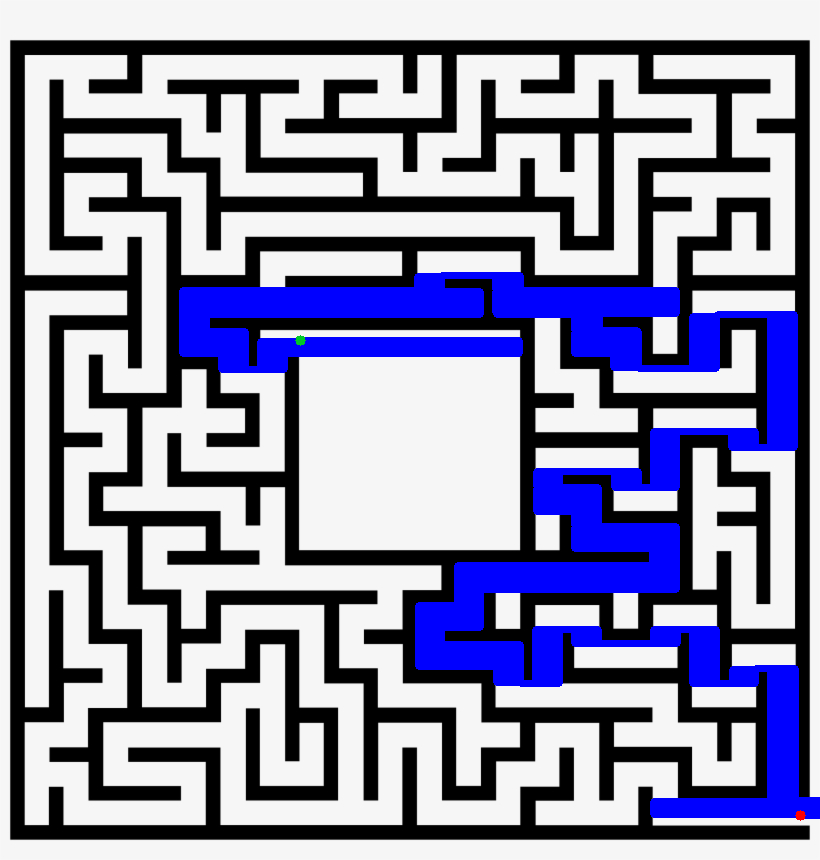

In [35]:
solve = solve_maze_dfs('maze_images/hard_maze.png', 300, 340, 800,815)
solve

rows 1128
cols 1131
found
drawing path


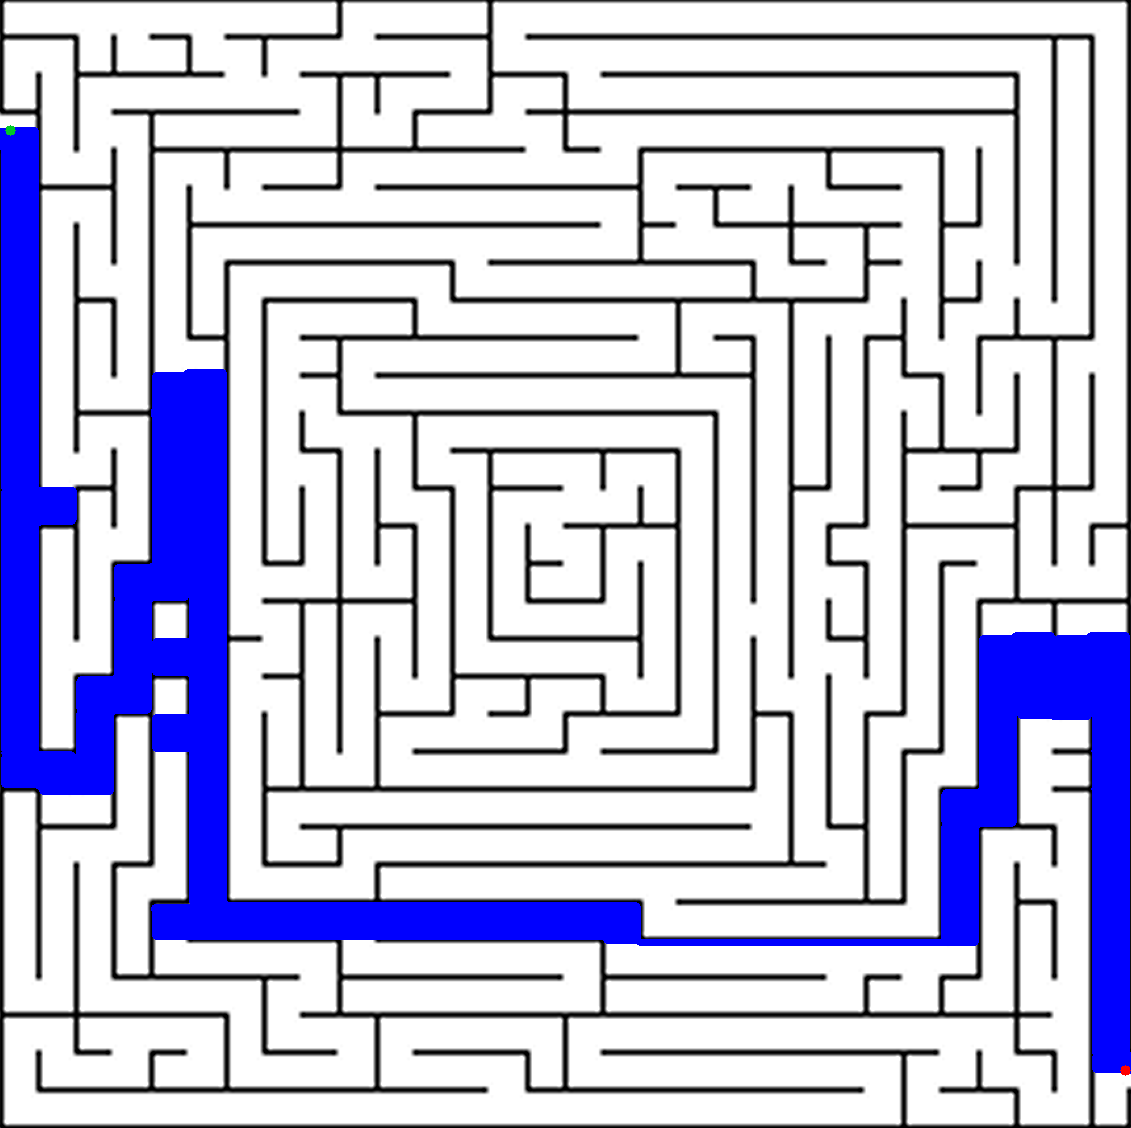

In [33]:
solve3 = solve_maze_bfs('maze_images/hard_maze2_cropped.png', 10, 130, 1125, 1070)
solve3